In [143]:
import pandas as pd
import numpy as np
from bioinfokit.analys import stat
from scipy import stats as sci_stats

In [2]:
TEDS_Cleaned = pd.read_csv('TEDS_cleaned_data_categorical_field_values.csv')

In [4]:
TEDS_Cleaned['RACE'].value_counts()

White                                         3336719
African American                               881563
Other single race                              392134
Missing                                        138662
American Indian                                117754
Two or more races                              111653
Asian                                           32637
Native Haiwaiian or Other Pacific Islander      26239
Alaskan Native                                  11445
Asian or Pacific Islander                        1270
Name: RACE, dtype: int64

In [5]:
STAND_Data = pd.read_excel('2021_08_25_Stand_data.xlsx')

In [7]:
STAND_Data['Race'].value_counts()

Black or African American           170
White                                16
Bi-racial                             4
Other                                 2
Latin American/Hispanic               1
American Indian or Alaska Native      1
Name: Race, dtype: int64

### Sample from each Race

In [19]:
random_african_american = TEDS_Cleaned[TEDS_Cleaned['RACE'] == 'African American'].sample(n=438000)

In [20]:
random_white = TEDS_Cleaned[TEDS_Cleaned['RACE'] == 'White'].sample(n=41000)

In [21]:
random_biracial = TEDS_Cleaned[TEDS_Cleaned['RACE'] == 'Two or more races'].sample(n=10500)

In [22]:
random_other = TEDS_Cleaned[TEDS_Cleaned['RACE'] == 'Other single race'].sample(n=5000)

In [23]:
random_indian = TEDS_Cleaned[TEDS_Cleaned['RACE'] == 'American Indian'].sample(n=5500)

In [29]:
frames = [random_african_american, random_white, random_biracial, random_other, random_indian]

In [30]:
sampled_demographic = pd.concat(frames)

In [31]:
sampled_demographic

,EDUC,MARSTAT,SERVICES,DETCRIM,LOS,PSOURCE,NOPRIOR,ARRESTS,EMPLOY,METHUSE,...,STIMFLG,BENZFLG,TRNQFLG,BARBFLG,SEDHPFLG,INHFLG,OTCFLG,OTHERFLG,IDU,ALCDRUG
2172155,12,Never married,"Detox, 24 hour, free-standing residential",Missing,NaN,Individual (includes self-referral),No prior treatment episodes,None,Not in labor force,No,...,0,0,0,0,0,0,0,0,No substance reported,Alcohol only
2612607,14,Separated,"Ambulatory, non-intensive outpatient",Missing,NaN,Individual (includes self-referral),No prior treatment episodes,None,Part-time,No,...,0,0,0,0,0,0,0,0,No substance reported,Other drugs only
1838568,12,Missing,"Detox, 24 hour, free-standing residential",Missing,NaN,Other community referral,NaN,None,Not in labor force,No,...,0,0,0,0,0,0,0,0,No substance reported,Other drugs only
1599759,10,Never married,"Detox, 24 hour, free-standing residential",Missing,NaN,Other community referral,NaN,None,Unemployed,No,...,0,0,0,0,0,0,0,0,IDU not reported,Other drugs only
2305696,8,Never married,"Ambulatory, non-intensive outpatient",Missing,400.0,Other health care provider,NaN,None,Unemployed,No,...,0,0,0,0,0,0,0,0,No substance reported,Alcohol and other drugs
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4849354,10,Never married,"Rehab/residential, long term (more than 30 days)",Missing,75.0,Individual (includes self-referral),NaN,Once,Unemployed,No,...,0,0,0,0,0,0,0,0,NaN,Alcohol and other drugs
3385880,10,Never married,"Ambulatory, non-intensive outpatient",Missing,75.0,Individual (includes self-referral),No prior treatment episodes,None,Missing,No,...,0,0,0,0,0,0,0,0,NaN,Alcohol and other drugs
3207419,16,Never married,"Ambulatory, non-intensive outpatient",Probation/parole,270.0,Court/criminal justice referral/DUI/DWI,NaN,None,Full-time,No,...,0,0,0,0,0,0,0,0,No substance reported,Other drugs only
2096472,10,Never married,"Ambulatory, non-intensive outpatient",Missing,53.0,School (educational),Missing,None,Not in labor force,No,...,0,0,0,0,0,0,0,0,No substance reported,None


### Race Chi Square

In [96]:
test_df = sampled_demographic

In [97]:
test2_df = pd.pivot_table(test_df[['RACE','REASON','EDUC']],values='EDUC',index=['RACE'],columns='REASON',aggfunc=np.sum).reset_index().rename_axis(None,axis=1)

In [98]:
res = stat()
res.chisq(df=test2_df.set_index('RACE'))

In [161]:
test2_df = test2_df.set_index('RACE')

In [162]:
test2_df

,0,1
RACE,,
African American,3093154,1994092
American Indian,25082,37198
Other single race,32962,23346
Two or more races,78926,44062
White,291518,201764


In [100]:
print(res.summary)


Chi-squared test for independence

Test              Df    Chi-square    P-value
--------------  ----  ------------  ---------
Pearson            4       12046.3          0
Log-likelihood     4       11738.1          0



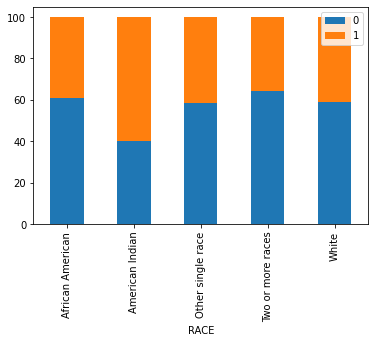

In [163]:
cols = [0,1]
test2_df[cols] = test2_df[cols].div(test2_df[cols].sum(axis=1), axis=0).multiply(100)

test2_df.plot(kind='bar',stacked=True)

### Marital Status

In [199]:
sampled_demographic['MARSTAT'].value_counts()

Never married        294141
Missing               95412
Divorced, widowed     44262
Now married           42547
Separated             23638
Name: MARSTAT, dtype: int64

In [200]:
sampled_demographic['MARSTAT'] = sampled_demographic.apply(lambda x: 'Never married' if x['MARSTAT'] == 'Missing' else x['MARSTAT'],axis=1)

In [201]:
sampled_demographic['MARSTAT'].value_counts()

Never married        389553
Divorced, widowed     44262
Now married           42547
Separated             23638
Name: MARSTAT, dtype: int64

In [202]:
marriage_df = pd.pivot_table(test_df[['MARSTAT','REASON','EDUC']],values='EDUC',index=['MARSTAT'],columns='REASON',aggfunc=np.sum).reset_index().rename_axis(None,axis=1)

In [203]:
marriage_df

,MARSTAT,0,1
0,"Divorced, widowed",332580,202038
1,Never married,2697000,1803514
2,Now married,311888,195738
3,Separated,180174,99172


In [204]:
marriage_df = marriage_df[marriage_df['MARSTAT'] != 'Missing']

In [205]:
marriage_df = marriage_df.set_index('MARSTAT')

In [206]:
marriage_df

,0,1
MARSTAT,,
"Divorced, widowed",332580,202038
Never married,2697000,1803514
Now married,311888,195738
Separated,180174,99172


In [207]:
sci_stats.chisquare(marriage_df)

Power_divergenceResult(statistic=array([5013189.48056503, 3509902.26920853]), pvalue=array([0., 0.]))

In [208]:
res = stat()
res.chisq(df=marriage_df)
print(res.summary)


Chi-squared test for independence

Test              Df    Chi-square    P-value
--------------  ----  ------------  ---------
Pearson            3       3328.8           0
Log-likelihood     3       3356.57          0



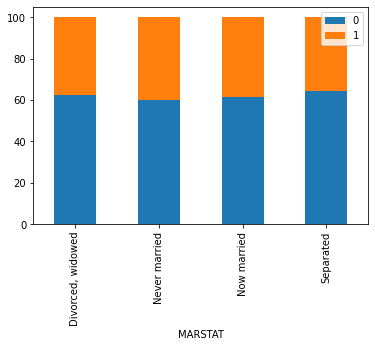

In [209]:
cols = [0,1]
marriage_df[cols] = marriage_df[cols].div(marriage_df[cols].sum(axis=1), axis=0).multiply(100)

marriage_df.plot(kind='bar',stacked=True)

### Substance Use

In [116]:
sampled_demographic['SUB1'].value_counts()

Alcohol                         165439
Marijuana/hashish               100773
Heroin                           91178
Cocaine/crack                    63511
Methamphetamines/speed           23057
Other opiates and synthetics     19309
Missing                          11440
None                             10780
PCP                               4320
Other drugs                       3536
Benzodiazepines                   2574
Other amphetamines                1670
Hallucinogens                      838
Non-prescription methadone         467
Other stimulants                   403
Other sedatives or hypnotics       336
Inhalants                          145
Over-the-counter medications       119
Barbiturates                        77
Other tranquilizers                 28
Name: SUB1, dtype: int64

In [210]:
sampled_demographic['SUB1'] = sampled_demographic.apply(lambda x: 'Alcohol' if x['SUB1'] == 'Missing' else x['SUB1'],axis=1)

In [211]:
sampled_demographic['SUB1'].value_counts()

Alcohol                         176879
Marijuana/hashish               100773
Heroin                           91178
Cocaine/crack                    63511
Methamphetamines/speed           23057
Other opiates and synthetics     19309
None                             10780
PCP                               4320
Other drugs                       3536
Benzodiazepines                   2574
Other amphetamines                1670
Hallucinogens                      838
Non-prescription methadone         467
Other stimulants                   403
Other sedatives or hypnotics       336
Inhalants                          145
Over-the-counter medications       119
Barbiturates                        77
Other tranquilizers                 28
Name: SUB1, dtype: int64

In [212]:
substance_df = pd.pivot_table(test_df[['SUB1','REASON','EDUC']],values='EDUC',index=['SUB1'],columns='REASON',aggfunc=np.sum).reset_index().rename_axis(None,axis=1)

In [213]:
substance_df = substance_df[substance_df['SUB1'] != 'Missing']

In [214]:
substance_df = substance_df.set_index('SUB1')

In [215]:
substance_df

,0,1
SUB1,,
Alcohol,1039840,1041472
Barbiturates,446,450
Benzodiazepines,17532,13048
Cocaine/crack,480550,260162
Hallucinogens,5800,3722
Heroin,738004,326734
Inhalants,1254,518
Marijuana/hashish,745332,397444
Methamphetamines/speed,172270,99164


In [216]:
res = stat()
res.chisq(df=substance_df)
print(res.summary)


Chi-squared test for independence

Test              Df    Chi-square    P-value
--------------  ----  ------------  ---------
Pearson           18        169161          0
Log-likelihood    18        169366          0



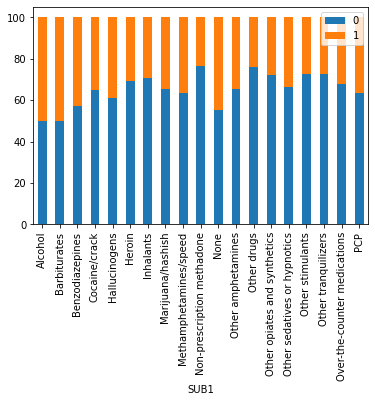

In [217]:
cols = [0,1]
substance_df[cols] = substance_df[cols].div(substance_df[cols].sum(axis=1), axis=0).multiply(100)

substance_df.plot(kind='bar',stacked=True)

### Frequency

In [125]:
sampled_demographic['FREQ1'].value_counts()

Daily use               209478
Some use                134204
No use in past month    102129
Missing                  54189
Name: FREQ1, dtype: int64

In [218]:
sampled_demographic['FREQ1'] = sampled_demographic.apply(lambda x: 'Daily use' if x['FREQ1'] == 'Missing' else x['FREQ1'],axis=1)

In [219]:
sampled_demographic['FREQ1'].value_counts()

Daily use               263667
Some use                134204
No use in past month    102129
Name: FREQ1, dtype: int64

In [220]:
frequency_df = pd.pivot_table(test_df[['FREQ1','REASON','EDUC']],values='EDUC',index=['FREQ1'],columns='REASON',aggfunc=np.sum).reset_index().rename_axis(None,axis=1)

In [221]:
frequency_df = frequency_df[frequency_df['FREQ1'] != 'Missing']

In [222]:
frequency_df = frequency_df.set_index('FREQ1')

In [223]:
frequency_df

,0,1
FREQ1,,
Daily use,1805572,1251206
No use in past month,705112,488202
Some use,1010958,561054


In [224]:
res = stat()
res.chisq(df=frequency_df)
print(res.summary)


Chi-squared test for independence

Test              Df    Chi-square    P-value
--------------  ----  ------------  ---------
Pearson            2       13164.6          0
Log-likelihood     2       13270            0



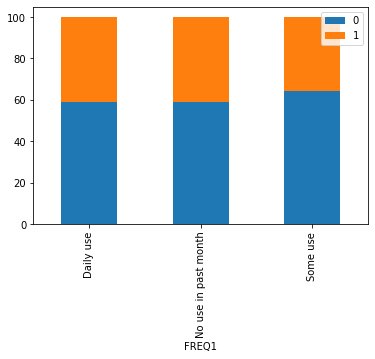

In [225]:
cols = [0,1]
frequency_df[cols] = frequency_df[cols].div(frequency_df[cols].sum(axis=1), axis=0).multiply(100)

frequency_df.plot(kind='bar',stacked=True)

### Gender

In [226]:
sampled_demographic['GENDER'].value_counts()

Male      351828
Female    148172
Name: GENDER, dtype: int64

In [227]:
gender_df = pd.pivot_table(test_df[['GENDER','REASON','EDUC']],values='EDUC',index=['GENDER'],columns='REASON',aggfunc=np.sum).reset_index().rename_axis(None,axis=1)

In [228]:
gender_df = gender_df.set_index('GENDER')

In [229]:
gender_df

,0,1
GENDER,,
Female,1117168,615008
Male,2404474,1685454


In [230]:
res = stat()
res.chisq(df=gender_df)
print(res.summary)


Chi-squared test for independence

Test              Df    Chi-square    P-value
--------------  ----  ------------  ---------
Pearson            1       16570            0
Log-likelihood     1       16699.2          0



In [231]:
test_gender = gender_df

In [232]:
cols = [0,1]
test_gender[cols] = test_gender[cols].div(test_gender[cols].sum(axis=1), axis=0).multiply(100)

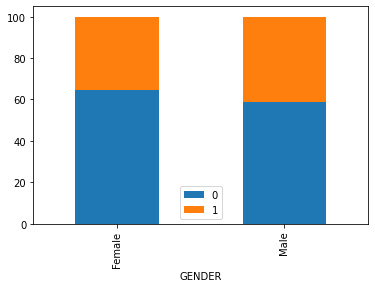

In [233]:
test_gender.plot(kind='bar',stacked=True)

### Services

In [234]:
sampled_demographic['SERVICES'].value_counts()

Ambulatory, non-intensive outpatient                242347
Ambulatory, intensive outpatient                     71720
Detox, 24 hour, free-standing residential            70376
Rehab/residential, short term (30 days or fewer)     58274
Rehab/residential, long term (more than 30 days)     37834
Detox, 24 hour, hospital inpatient                   16116
Ambulatory, detoxification                            2432
Rehab/residential, hospital (non-detox)                901
Name: SERVICES, dtype: int64

In [235]:
services_df = pd.pivot_table(test_df[['SERVICES','REASON','EDUC']],values='EDUC',index=['SERVICES'],columns='REASON',aggfunc=np.sum).reset_index().rename_axis(None,axis=1)

In [236]:
services_df = services_df.set_index('SERVICES')

In [237]:
services_df

,0,1
SERVICES,,
"Ambulatory, detoxification",13336,15630
"Ambulatory, intensive outpatient",636986,201958
"Ambulatory, non-intensive outpatient",1917686,892780
"Detox, 24 hour, free-standing residential",313602,508756
"Detox, 24 hour, hospital inpatient",52022,136980
"Rehab/residential, hospital (non-detox)",3034,7088
"Rehab/residential, long term (more than 30 days)",263478,176352
"Rehab/residential, short term (30 days or fewer)",321498,360918


In [238]:
res = stat()
res.chisq(df=services_df)
print(res.summary)


Chi-squared test for independence

Test              Df    Chi-square    P-value
--------------  ----  ------------  ---------
Pearson            7        469704          0
Log-likelihood     7        469282          0



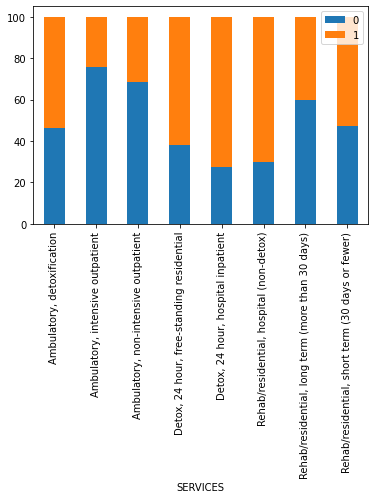

In [239]:
cols = [0,1]
services_df[cols] = services_df[cols].div(services_df[cols].sum(axis=1), axis=0).multiply(100)

services_df.plot(kind='bar',stacked=True)

### Arrests

In [240]:
sampled_demographic['ARRESTS'].value_counts()

None                 415713
Missing               55197
Once                  24182
Two or more times      4908
Name: ARRESTS, dtype: int64

In [241]:
sampled_demographic['ARRESTS'] = sampled_demographic.apply(lambda x: 'None' if x['ARRESTS'] == 'Missing' else x['ARRESTS'],axis=1)

In [242]:
sampled_demographic['ARRESTS'].value_counts()

None                 470910
Once                  24182
Two or more times      4908
Name: ARRESTS, dtype: int64

In [243]:
arrests_df = pd.pivot_table(test_df[['ARRESTS','REASON','EDUC']],values='EDUC',index=['ARRESTS'],columns='REASON',aggfunc=np.sum).reset_index().rename_axis(None,axis=1)

In [244]:
arrests_df = arrests_df[arrests_df['ARRESTS'] != 'Missing']

In [245]:
arrests_df = arrests_df.set_index('ARRESTS')

In [246]:
arrests_df

,0,1
ARRESTS,,
None,3316378,2171618
Once,172188,106096
Two or more times,33076,22748


In [247]:
res = stat()
res.chisq(df=arrests_df)
print(res.summary)


Chi-squared test for independence

Test              Df    Chi-square      P-value
--------------  ----  ------------  -----------
Pearson            2       267.551  7.98191e-59
Log-likelihood     2       268.37   5.29781e-59



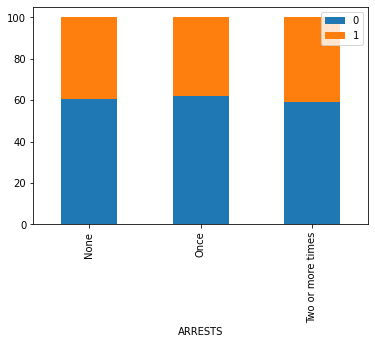

In [248]:
cols = [0,1]
arrests_df[cols] = arrests_df[cols].div(arrests_df[cols].sum(axis=1), axis=0).multiply(100)

arrests_df.plot(kind='bar',stacked=True)

### Psychiatric Problems

In [190]:
sampled_demographic['PSYPROB'].value_counts()

No         256118
Yes        170920
Missing     72962
Name: PSYPROB, dtype: int64

In [249]:
sampled_demographic['PSYPROB'] = sampled_demographic.apply(lambda x: 'No' if x['PSYPROB'] == 'Missing' else x['PSYPROB'],axis=1)

In [250]:
sampled_demographic['PSYPROB'].value_counts()

No     329080
Yes    170920
Name: PSYPROB, dtype: int64

In [251]:
psych_df = pd.pivot_table(test_df[['PSYPROB','REASON','EDUC']],values='EDUC',index=['PSYPROB'],columns='REASON',aggfunc=np.sum).reset_index().rename_axis(None,axis=1)

In [252]:
psych_df = psych_df[psych_df['PSYPROB'] != 'Missing']

In [253]:
psych_df = psych_df.set_index('PSYPROB')

In [254]:
res = stat()
res.chisq(df=psych_df)
print(res.summary)


Chi-squared test for independence

Test              Df    Chi-square    P-value
--------------  ----  ------------  ---------
Pearson            1       88697.6          0
Log-likelihood     1       90156.7          0



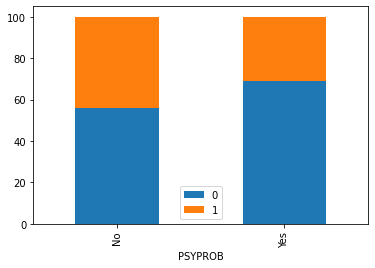

In [255]:
cols = [0,1]
psych_df[cols] = psych_df[cols].div(psych_df[cols].sum(axis=1), axis=0).multiply(100)

psych_df.plot(kind='bar',stacked=True)

In [256]:
sampled_demographic.to_csv('sampled_teds_data.csv')